## Spring 2023 : CS5720
### Neural Networks & Deep Learning ICP_4 : Jahnavi Chadalavada (700728443)

## 1. Data Manipulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### a. Read the provided CSV file ‘data.csv’.
#### b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

In [2]:
dataset = pd.read_csv("data.csv")

dataset.shape

(169, 4)

In [3]:
dataset.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


#### c. Show the basic statistical description about the data.

In [4]:
dataset.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


#### d. Check if the data has null values.

In [5]:
dataset.info() # Calories are having null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


#### Replace the null values with the mean

In [6]:
dataset=dataset.fillna(dataset.mean())
dataset.head(20)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


#### e. Select at least two columns and aggregate the data using: min, max, count, mean.

In [7]:
# dataset.aggregate(['min', 'max', 'count', 'mean']) #aggregate functions on all columns
dataset.aggregate({"Duration":['min', 'max', 'count', 'mean'],"Pulse":['min', 'max', 'count', 'mean']})

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


#### f. Filter the dataframe to select the rows with calories values between 500 and 1000.

In [8]:
dataset[(dataset['Calories'] >= 500) & (dataset['Calories'] <= 1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


#### g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

In [9]:
dataset[(dataset['Calories'] > 500) & (dataset['Pulse'] < 100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


#### h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [10]:
df_modified = dataset.drop("Maxpulse",axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


#### i. Delete the “Maxpulse” column from the main df dataframe

In [11]:
del dataset["Maxpulse"]
dataset

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


#### j. Convert the datatype of Calories column to int datatype.

In [12]:
dataset["Calories"] = dataset['Calories'].astype('int')
dataset

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


#### k. Using pandas create a scatter plot for the two columns (Duration and Calories).

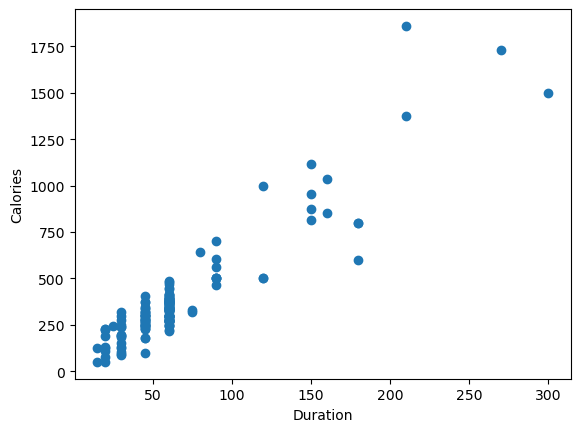

In [13]:
plt.scatter(dataset["Duration"],dataset["Calories"])
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

## 2. Linear Regression

#### a) Import the given “Salary_Data.csv”

In [14]:
dataset = pd.read_csv("Salary_Data.csv")

dataset.shape

(30, 2)

#### b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

In [15]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Salary",axis=1)
target = dataset["Salary"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=0)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(21, 1) (9, 1)
(21,) (9,)


#### c) Train and predict the model.

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

#### d) Calculate the mean_squared error

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_pred))

import numpy as np
MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
print(MSE)

23370078.800832972
23370078.800832972


#### e) Visualize both train and test data using scatter plot.

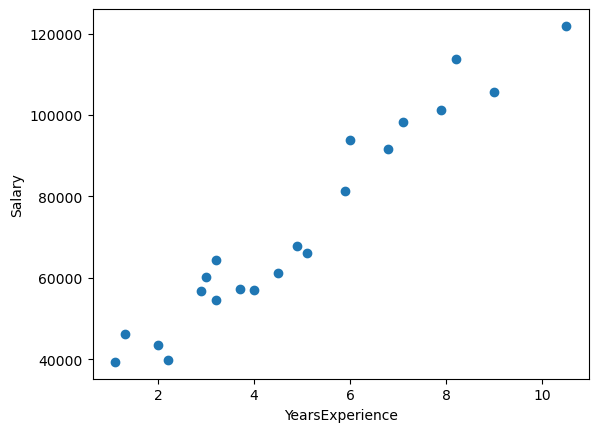

In [18]:
plt.scatter(X_train,Y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

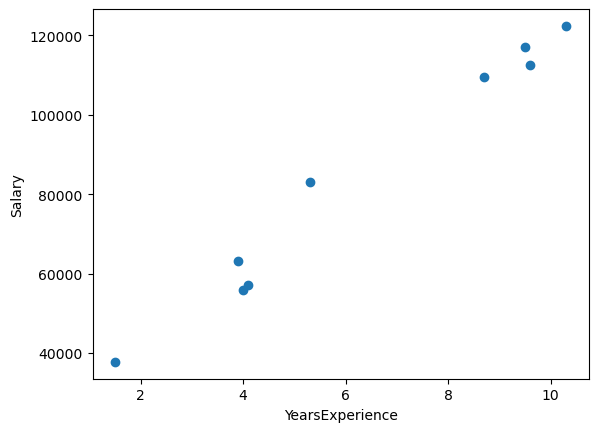

In [19]:
plt.scatter(X_test,Y_test)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()